# AE2: Wypełnianie koła prostokątami
Adrianna Grudzień

Rozwiązanie wariantu problemu znanego w literaturze jako `cutting stock` problem.

Mamy dane koło o promieniu r oraz zbiór dostępnych prostokątów zadanych przez trzy liczby: wysokość, szerokość i wartość.

Celem jest ułożenie prostokątów w kole tak, aby zmaksymalizować sumę ich wartości, spełniając następujące warunki:

- boki wszystkich prostokątów były równoległe do osi układu,
- wnętrza prostokątów nie miały części wspólnej (intuicyjnie: prostokąty nie nachodzą na siebie, ale mogą się stykać bokami),
- każdy prostokąt można wstawić dowolnie wiele razy.


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd

W nazwie pliku jest podany `promień koła`, plik jest w formacie csv: pierwsza kolumna to `szerokość` prostokąta, druga to `wysokość`, trzecia to `wartość` prostokąta.

In [2]:
r1000 = pd.read_csv('data/r1000.csv', header=None)
r1000.columns = ['szer.', 'wys.', '$']
r1000

,szer.,wys.,$
0,200,120,200
1,200,160,300
2,250,160,500
3,100,120,40


# Opis koncepcji rozwiązania
Koło przechowuję w postaci macierzy (x,y), gdzie drewno jest oznaczone wartością 1, a brak drewna - 0. Po wycięciu prostokąta, obszar wycięty zmienia się z 1 na 0.

**1. Inicjalizacja populacji.** \
Najpierw obliczam pole koła i obliczam ile maksymalnie prostokątów się w nim zmieści (na podstawie pola powierzchni) - n. Następnie wybieram losowo 1 punkt z koła (wierzchołek jednego prostokąta). Szukam takiego ułożenie prostokąta, żeby mieścił się na obszarze drewnianym. Możliwych ułożeń jest 8. Sprawdzanie zaczynam od największego możliwego prostokąta - jeśli się nie mieści, sprawdzam coraz to mniejsze prostokąty.

**2. Warunek stopu.** \
Określony poziom znalezionego rozwiązania wynikający z kryteriów oceny zadania. To znaczy wartość sumaryczna prostokątów przynajmniej 30 000 w kole o średnicy 800 oraz 30 000 w kole o średnicy 1 200, minimum 17 500 w kole o średnicy 1 000 oraz minimum 25 000 w kole o średnicy 1 100.

**3. Krzyżowanie.** \
Losuję 2 rozwiązania z populacji. Nowego osobnika tworzę z prostokątów z górnej połowy pierwszego z nich oraz dolnej połowy drugiego z nich (tzn. biorę prostokąty, których wierzchołek się tam znajduje).

**4. Mutacja.** \
Przesunięcie wszystkich prostokątów o losową wartość w losową stronę i następne usunięcie tych, które wychodzą poza koło. \
Jeżeli na kole jest jeszcze miejsce, to wstawiam tam prostokąt. (Obliczam ile maksymalnie najmniejszych prostokątów się mieści. Zaczynam od największego możliwego i jeśli po wylosowaniu okazuje się, że jednak się nie mieści na żaden z 8 sposobów, to losuję kolejny punkt dla tego prostokąta (i tak k razy). Jeśli po k takich losowań nie udało się, to testuję mniejsze prostokąty.

**5. Ewaluacja.** \
Liczę nagrodę, czyli zarobione z danego wycięcia pieniądze.

**6. Selekcja.** \
W populacji zostawiam te wycięcia, które jednocześnie są najbardziej opłacalne pieniężnie i mają najwięcej wolnego miejsca w kole (po wycięciu), czyli te, w których zostało więcej niewykorzystanego materiału.

## Metody (funkcje) pomocnicze

### Do zrobienia:
- sprawdź, czy cały obszar prostokąta pokrywa wartości 1 w macierzy koła (tzn. nie nachodzi na 0)
- sprawdź kolejno wszystkie możliwe ułożenia jednego prostokąta ,,wokół'' podanego (wylosowanego) punktu i zwróć współrzędne prostokąta, który się mieści
- sprawdź kolejno wszystkie rozmiary prostokątów wokół punktu (w tym 8 możliwych rotacji)
- wylosuj współrzędne punktu z macierzy koła spośród 1
- oblicz pole wszystkich prostokątów osobnika (do oceny ile miejsca zostało)
- przesuń wszystkie prostokąty o wektor (x,y)

### Zrobione:
- stwórz macierz koła
- zamień 1 na 0 przy wycięciu prostokąta
- zamień 0 na 1 przy usunięciu prostokąta
- oblicz ile najmniejszych prostokątów zmieści się w obszarze koła

In [3]:
r = 1000 # promień koła

In [4]:
# działa wolno :(
def create_circle_matrix(r):
    '''stwórz macierz koła

    r - promień koła'''
    M = np.zeros((2*r, 2*r))
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            if np.square(i-r) + np.square(j-r) <= np.square(r):
                M[i][j] = 1
    # plt.imshow(M)
    # plt.show()
    return M
    
M_default = create_circle_matrix(r)

In [12]:
rec2 = Rectangle([[500,500], [700,500], [700,700], [500,700]])

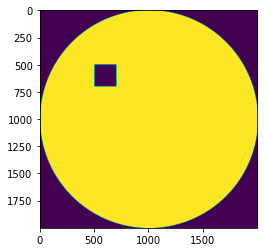

In [13]:
def cut_out(M, rectangle):
    '''zamień 1 na 0 przy wycięciu prostokąta

    M - macierz koła
    rectangle - obiekt Rectangle'''
    M[rectangle.x1:rectangle.x2, rectangle.y1:rectangle.y4] = 0
    plt.imshow(M)
    plt.show()  
    return M
    
M_cutted = cut_out(M, rec2)

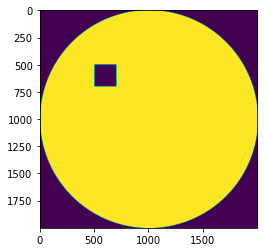

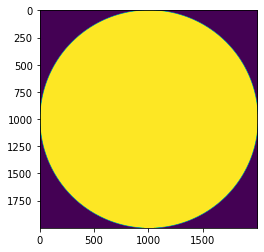

In [14]:
def restore(M, rectangle):
    '''zamień 0 na 1 przy usunięciu prostokąta
    M - macierz koła
    rectangle - obiekt Rectangle'''
    plt.imshow(M)
    plt.show()  
    M[rectangle.x1:rectangle.x2, rectangle.y1:rectangle.y4] = 1
    plt.imshow(M)
    plt.show()  
    return M
    
M_restored = restore(M_cutted, rec2)

In [15]:
def max_nr_of_rectangles(M, rectangle_area):
    '''oblicz ile prostokątów zmieści się w obszarze koła (być może już częściowo wyciętego)
    M - macierz koła
    rectangle_area - pole powierzchni najmniejszego prostokąta
    '''
    wood_area = np.sum(M)
    return int(wood_area)
    
max_nr_of_rectangles(M, 200)

3141547

# Klasy

In [15]:
# Dla każdego osobnika przechowuję tablicę prostokątów wyciętych z koła.
class Rectangle:
    def __init__(self, vertex_coordinates):
        '''vertex_coordinates - [(x1,y1), (x2,y2), (x3,y3), (x4,x4)]'''
        self.vertex_coordinates = vertex_coordinates
        self.x1 = vertex_coordinates[0][0]
        self.y1 = vertex_coordinates[0][1]
        self.x2 = vertex_coordinates[1][0]
        self.y2 = vertex_coordinates[1][1]
        self.x3 = vertex_coordinates[2][0]
        self.y3 = vertex_coordinates[2][1]
        self.x4 = vertex_coordinates[3][0]
        self.y4 = vertex_coordinates[3][1]
        self.length = self.x2 - self.x1
        self.height = self.y4 - self.y1
        self.area = self.length * self.height # pole powierzchni
        
class WoodenCircle:
    def __init__(self, radius):
        self.radius = radius
        self._init_circle_matrix() # macierz koła
        self.rectangles_arr = []
        
     
    def _init_circle_matrix(self):
        # self.M = np.zeros((2*self.radius, 2*self.radius))
        # for i in range(self.M.shape[0]):
        #     for j in range(self.M.shape[1]):
        #         if np.square(i-self.radius) + np.square(j-self.radius) <= np.square(self.radius):
        #             self.M[i][j] = 1
        self.M = copy.deepcopy(M_default)
        self._update_area() # pole powierzchni drewnianej
                    
    def _update_area(self):
        self.free_area = np.sum(self.M)
        
    def cut_rectangle(self, rectangle):
        #sprawdź, czy nie wychodzi poza obszar:
        if (self.M[rectangle.x1:rectangle.x2, rectangle.y1:rectangle.y4]).any() != 0:
            # wytnij:
            self.M[rectangle.x1:rectangle.x2, rectangle.y1:rectangle.y4] = 0
            self._update_area()
            self.rectangles_arr.append(rectangle)
       
    def restore_rectangle(self, rectangle):        
        self.M[rectangle.x1:rectangle.x2, rectangle.y1:rectangle.y4] = 1
        self._update_area()
        self.rectangles_arr.remove(rectangle)
    
    def move_one_rectangle(self, rec, x, y):
        new_rec = copy.deepcopy(rec)
        print(new_rec.vertex_coordinates)
        new_rec.vertex_coordinates = list(np.array(new_rec.vertex_coordinates)[:,0] + x) + list(np.array(new_rec.vertex_coordinates)[:,1] + y)
        print(new_rec.vertex_coordinates)
        # plt.imshow(self.M)
        # plt.show()
        self.restore_rectangle(rec)
        # plt.imshow(self.M)
        # plt.show()
        if (self.M[new_rec.x1:new_rec.x2, new_rec.y1:new_rec.y4]).any() != 0:
            print('elo')
            self.cut_rectangle(new_rec)
        else:
            self.cut_rectangle(rec)
        
    def move_rectangles(self, x, y):
        for rec in self.rectangles_arr:
            self.move_one_rectangle(rec, x, y)

In [ ]:
class AE:
    def __init__(self, N, radius, verbose_step=10):
        self.N = N # liczność populacji
        self.radius = radius # promień kół
        self.population = []
        self.verbose_step = verbose_step
        
    def _initialize_population(self):
        for i in range(self.N):
            wooden_circle = WoodenCircle(self.radius)
            
            self.population.append(wooden_circle)

In [6]:
wooden_circle = WoodenCircle(1000)

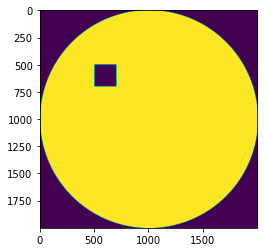

In [16]:
rec2 = Rectangle([[500, 500], [700, 500], [700, 700], [500, 700]])
wooden_circle.cut_rectangle(rec2)
plt.imshow(wooden_circle.M)

In [17]:
wooden_circle.move_rectangles(100, 20)

[[500, 500], [700, 500], [700, 700], [500, 700]]
[[500, 500], [700, 500], [700, 700], [500, 700]]
elo


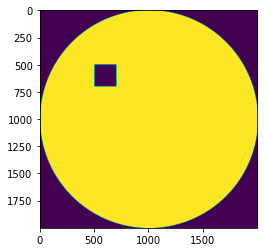

In [83]:
plt.imshow(wooden_circle.M)

In [181]:
(wooden_circle.rectangles_arr[0]).vertex_coordinates

[[500, 500], [700, 500], [700, 700], [500, 700]]

In [182]:
np.array((wooden_circle.rectangles_arr[0]).vertex_coordinates)[:,0] + 1

array([501, 701, 701, 501])

In [9]:
rec1 = Rectangle([(0,0), (200,0), (200,200), (0,200)])

In [26]:
rec1.height

2

In [ ]:
class AE:
    def __init__(self):
        

In [9]:
r1100 = pd.read_csv('data/r1100.csv', header=None)
r1200 = pd.read_csv('data/r1200.csv', header=None)
r800 = pd.read_csv('data/r800.csv', header=None)
r850 = pd.read_csv('data/r850.csv', header=None)